In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score,  GridSearchCV
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [2]:
#read_csv into file
full_features = pd.read_csv('full_features.csv')

full_features

year_planted_grafted   age yield_class  Daily_High  Daily _Low  \
0                     2009   6.0        high          94          68   
1                     2006   9.0        high          94          68   
2                     2011   4.0        high          94          68   
3                     2011   4.0        high          94          68   
4                     2012   3.0        high          94          68   
...                    ...   ...         ...         ...         ...   
3361                  2010   8.0        high          74          39   
3362                  2012   6.0         low          74          39   
3363                  2017   1.0         low          74          39   
3364                  2009  10.0        high          93          65   
3365                  2017   2.0         low          93          65   

      Precipitation   year  month  day  color_BLACK  ...  \
0                0.0  2015      7   13            0  ...   
1                0.0  2015      7   13            0  ...   
2                0.0  2015      7   13            0  ...   
3                0.0  2015      7   13            0  ...   
4                0.0  2015      7   13            0  ...   
...              ...   ...    ...  ...          ...  ...   
3361             0.0  2018     11   12            0  ...   
3362             0.0  2018     11   12            0  ...   
3363             0.0  2018     11   12            0  ...   
3364             0.0  2019      7    1            0  ...   
3365             0.0  2019      7    1            0  ...   

      EXPERIMENTAL 80B-30+9  EXPERIMENTAL 95B-59+6  FLAME SEEDLESS  \
0                         0                      0               0   
1                         0                      0               0   
2                         0                      0               1   
3                         0                      0               0   
4                         0                      0               0   
...                     ...                    ...             ...   
3361                      0                      0               0   
3362                      0                      0               0   
3363                      0                      0               0   
3364                      0                      0               0   
3365                      0                      0               0   

      IVORY - SHEEGENE 21  RED GLOBE  SCARLET ROYAL  SUGRAONE  SWEET GLOBE  \
0                       0          0              0         0            0   
1                       0          0              0         1            0   
2                       0          0              0         0            0   
3                       0          0              0         1            0   
4                       0          0              0         0            0   
...                   ...        ...            ...       ...          ...   
3361                    0          0              0         0            0   
3362                    0          0              0         0            0   
3363                    0          0              0         0            0   
3364                    0          0              0         0            0   
3365                    0          0              0         0            0   

      SWEET SCARLET  THOMPSON SEEDLESS  
0                 0                  0  
1                 0                  0  
2                 0                  0  
3                 0                  0  
4                 0                  0  
...             ...                ...  
3361              0                  0  
3362              0                  0  
3363              0                  0  
3364              0                  0  
3365              0                  0  

[3366 rows x 44 columns]

In [3]:
#Drop unneccessary columns and rows with NAN and infinity values
#Dataset includes var_boxes and acres 

yield_class = full_features['yield_class']

#drop yield_class from dataset
full_features = full_features.drop(['yield_class'], axis = 1)

# Define the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('clf', LinearSVC(C=0.1))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(full_features, yield_class, test_size=0.3, random_state=42)

# Train the classifier using the pipeline
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate model performance
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

        high       0.66      0.66      0.66       578
         low       0.54      0.54      0.54       432

    accuracy                           0.61      1010
   macro avg       0.60      0.60      0.60      1010
weighted avg       0.61      0.61      0.61      1010



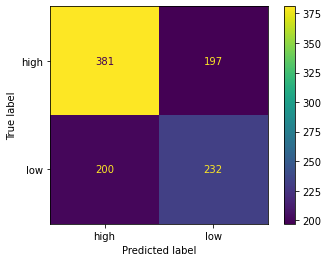

In [4]:
# Plot confusion matrix
plot_confusion_matrix(pipeline, X_test, y_test)
plt.show()

In [5]:
# Evaluate model using 5-fold cross-validation
scores = cross_val_score(pipeline, full_features, yield_class, cv=5)

# Print average performance across all folds
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy: 0.55 (+/- 0.05)
